In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-data/CarPrice_Assignment.csv
/kaggle/input/car-data/Data Dictionary - carprices.xlsx


## Load & Check data

In [2]:
df=pd.read_csv('/kaggle/input/car-data/CarPrice_Assignment.csv')
df1=df.copy()

In [3]:
#first 5 values of a dataset
pd.set_option('display.max_columns', None)
df1.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


Here, in CarName the company name and car name are mixed. So, we need to split company name and car name from CarName.

In [4]:
#Shape of the dataset
df1.shape

(205, 26)

In [5]:
#information about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#mathematical overview of the numerical data
df1.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##### Conclusion
* Maximum price for a car is 45400 and minimum is 5118.
* Average height of the car is 53.7248.
* Average size of the engine is 126.9073.

In [7]:
#mathematical overview of the non-numerical data
df1.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [8]:
#checking for duplicate value
df1.duplicated().sum()

0

In [9]:
#number of unique of value in each feature
df1.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## Data Cleaning

In [10]:
#null values in the dataset
df1.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
CompanyName=df['CarName'].apply(lambda x: x.split()[0])
df1.insert(3,"CompanyName",CompanyName)
df1.drop(columns=['car_ID','CarName'],axis=1,inplace=True)

In [12]:
df1['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Here, we can see that there seem to be some spelling error for e.g., 
* Nissan -> nissan
* porcshce->porsche
* vokswagen, vw-> volkswagen
* toyouta -> toyota
* maxda -> mazda

In [13]:
df1['CompanyName']=df1['CompanyName'].apply(lambda x: x.lower())
df1['CompanyName']=df1.CompanyName.replace('porcshce', 'porsche')
df1['CompanyName']=df1.CompanyName.replace('vokswagen', 'volkswagen')
df1['CompanyName']=df1.CompanyName.replace('vw', 'volkswagen')
df1['CompanyName']=df1.CompanyName.replace('toyouta', 'toyota')
df1['CompanyName']=df1.CompanyName.replace('maxda', 'mazda')

## EDA

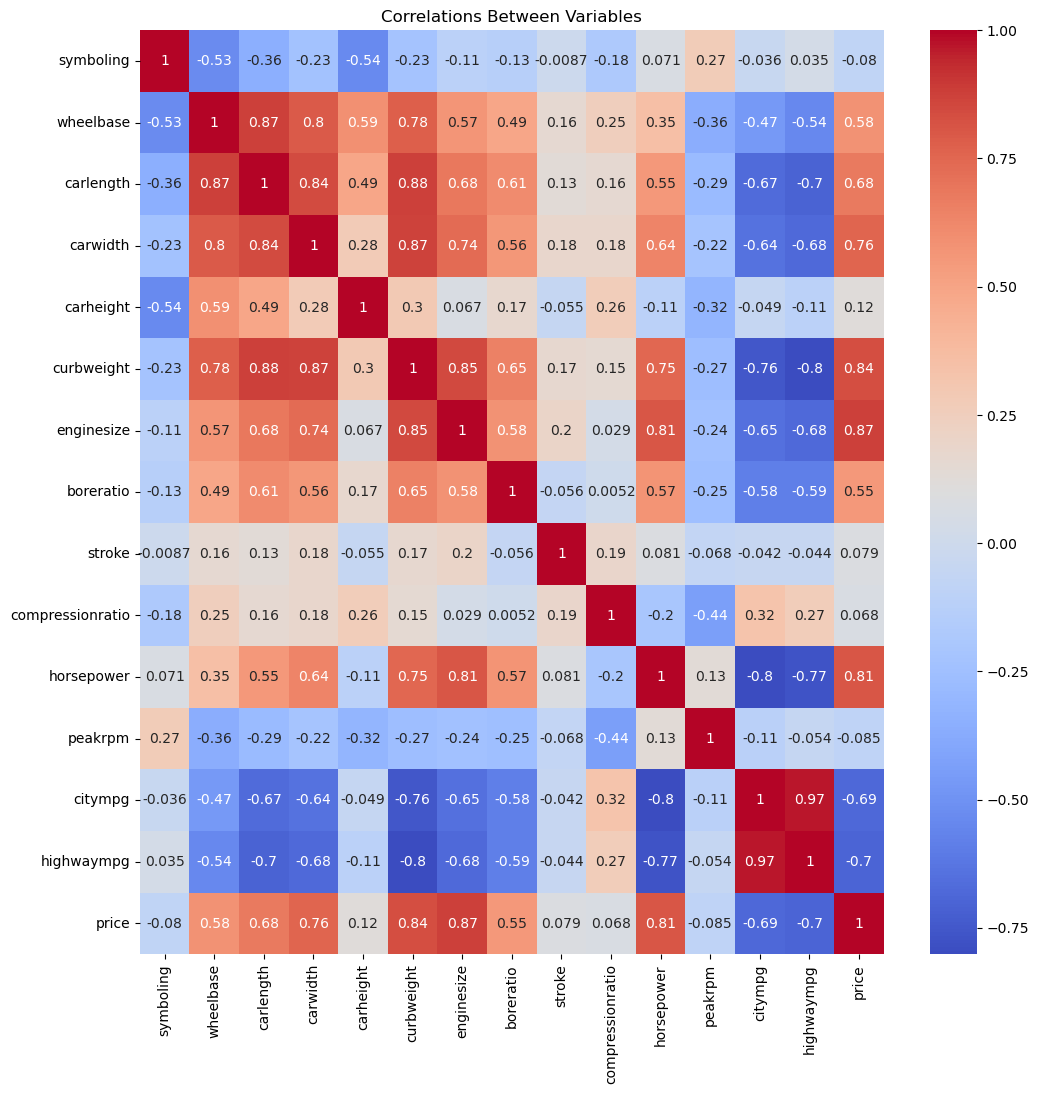

In [14]:
#Correlations Between Variables
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), cmap="coolwarm",annot=True)
plt.title("Correlations Between Variables", size=12)
plt.show()

##### Conclusion:
* horsepower, enginesize, curbweight, carwidth has good correlation with price.
* enginesize and horsepower has good correlation.

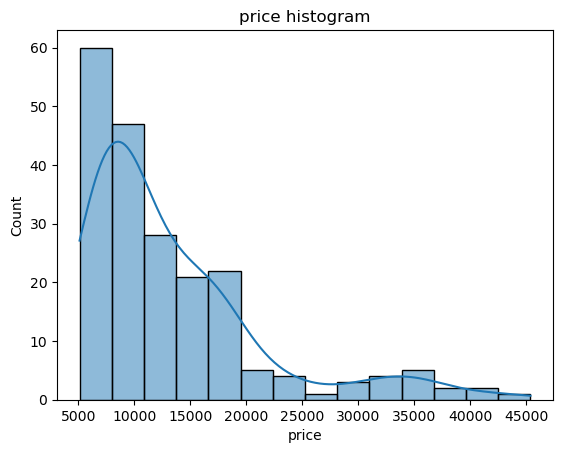

In [15]:
sns.histplot(data=df1, x=df1.price, kde=True)
plt.title('price histogram')
plt.show()

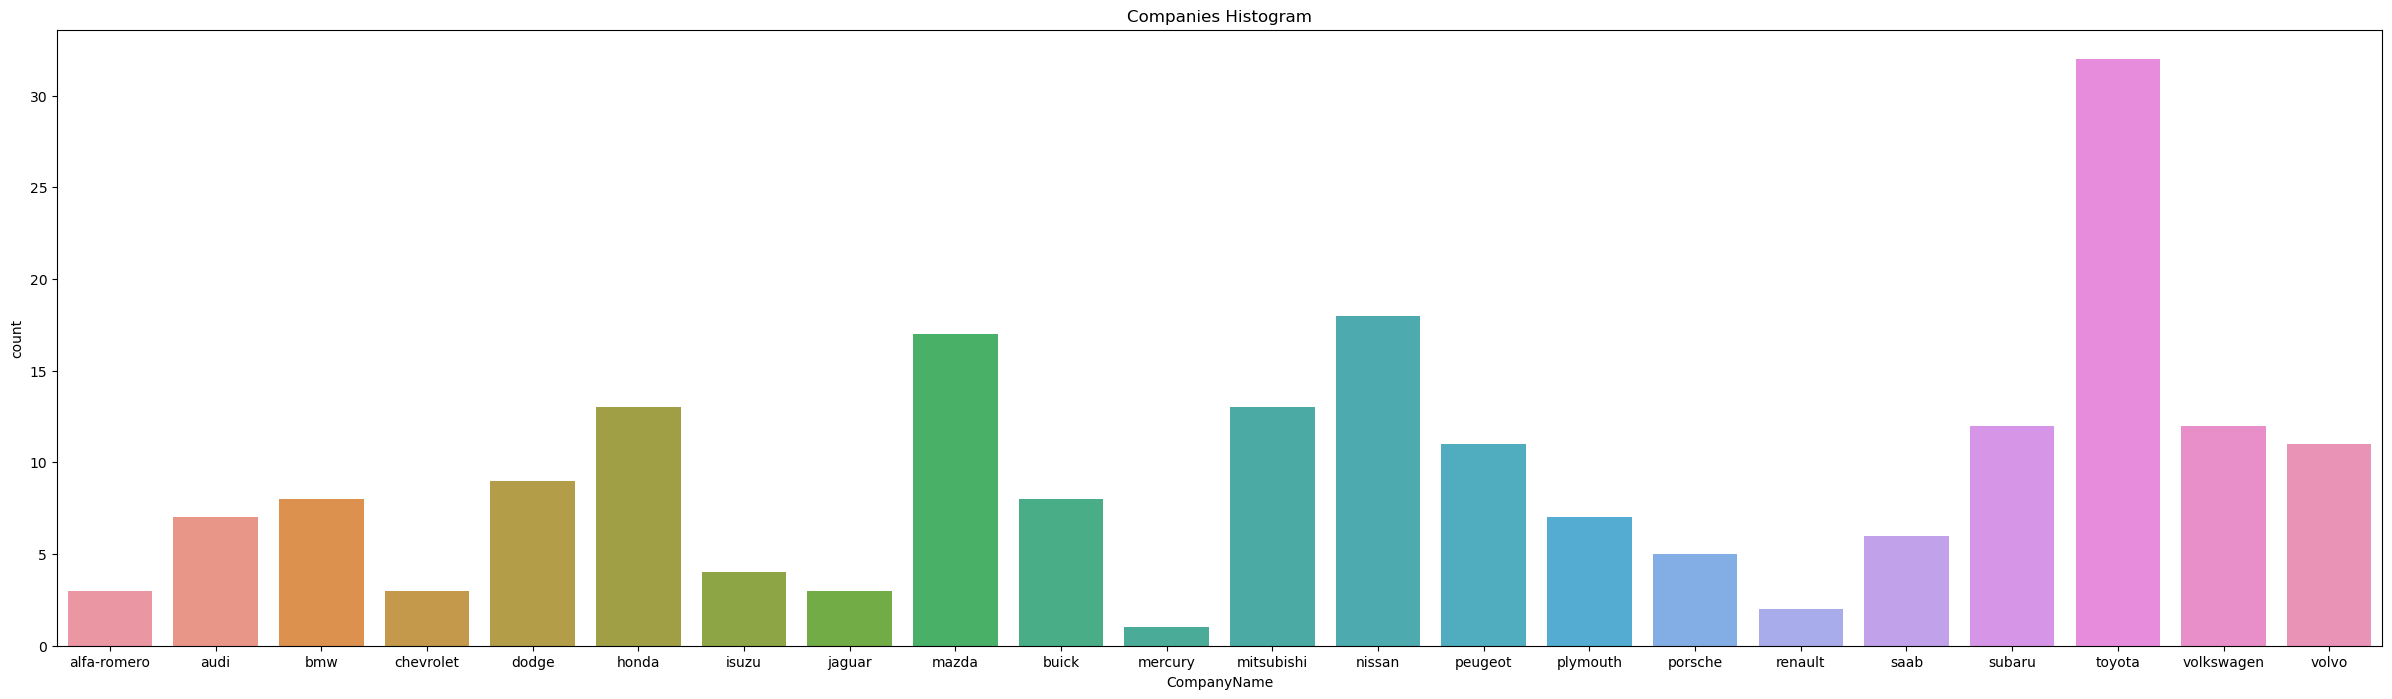

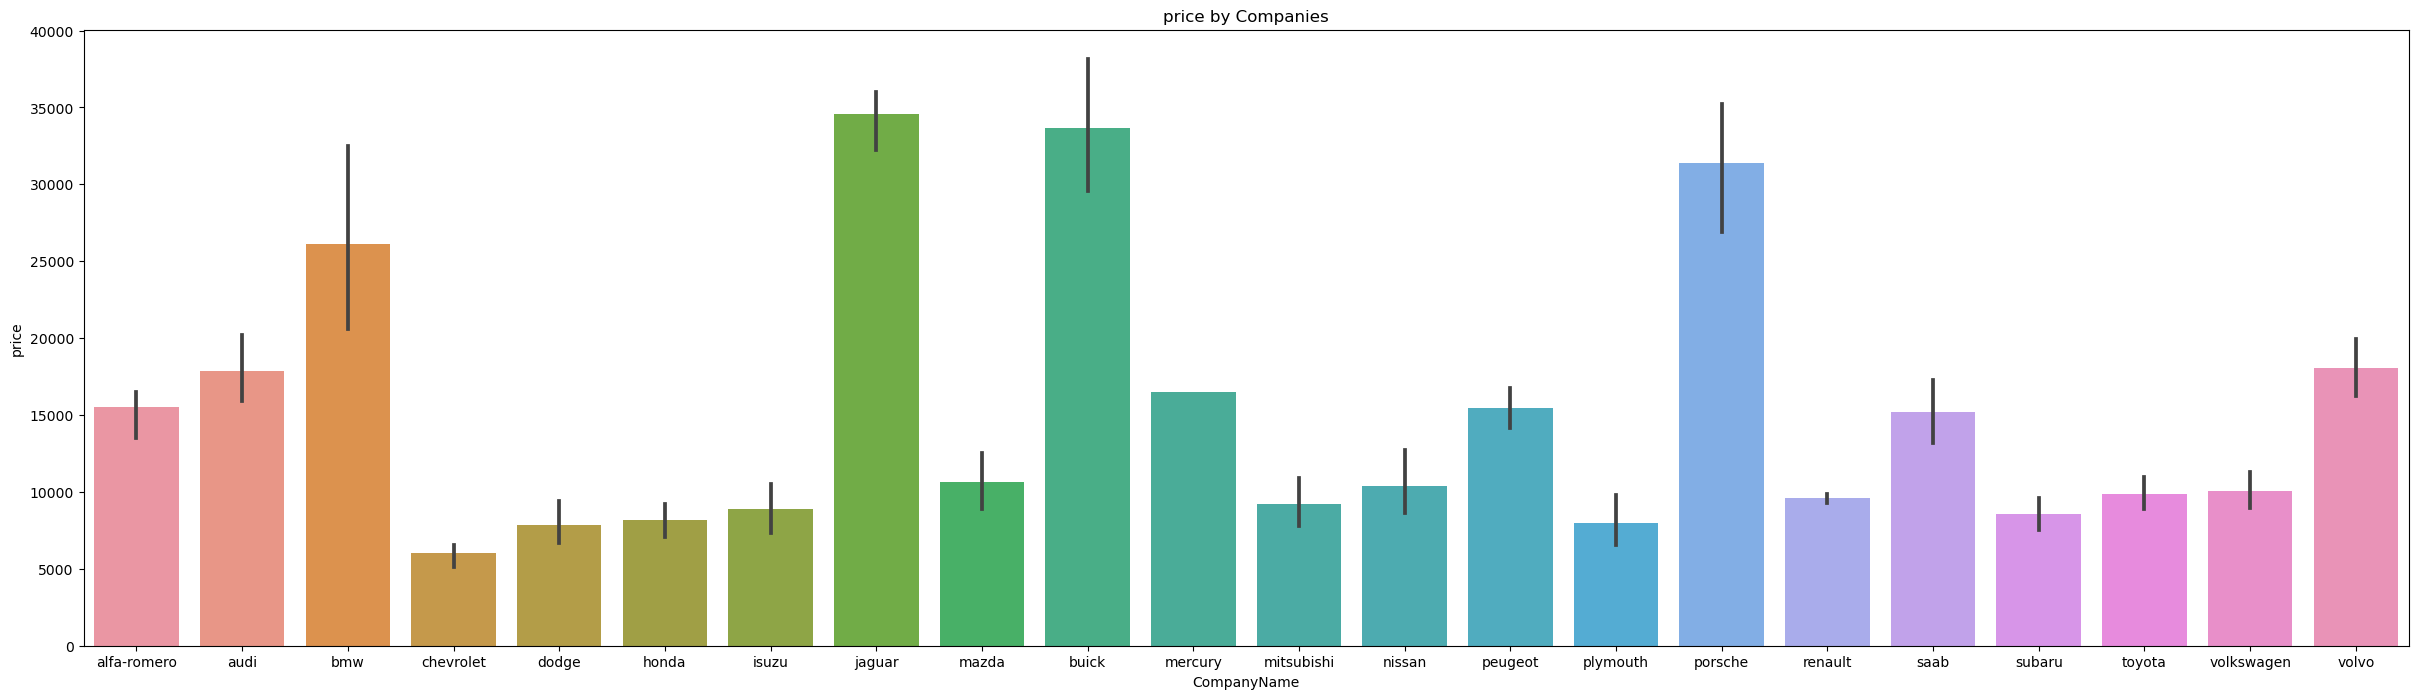

In [16]:
plt.figure(figsize=(30,8))
sns.countplot(data=df1, x=df1.CompanyName)
plt.title('Companies Histogram')
plt.show()

plt.figure(figsize=(30,8))
sns.barplot(data=df1, x=df1.CompanyName, y=df1.price)
plt.title('price by Companies')
plt.show()

##### Conclusion
* **toyota** is the best-selling car brand, followed by **nissan** as the second-best selling car.
* **jaguar** is the most expensive car, while the **buick** is the second most expensive car

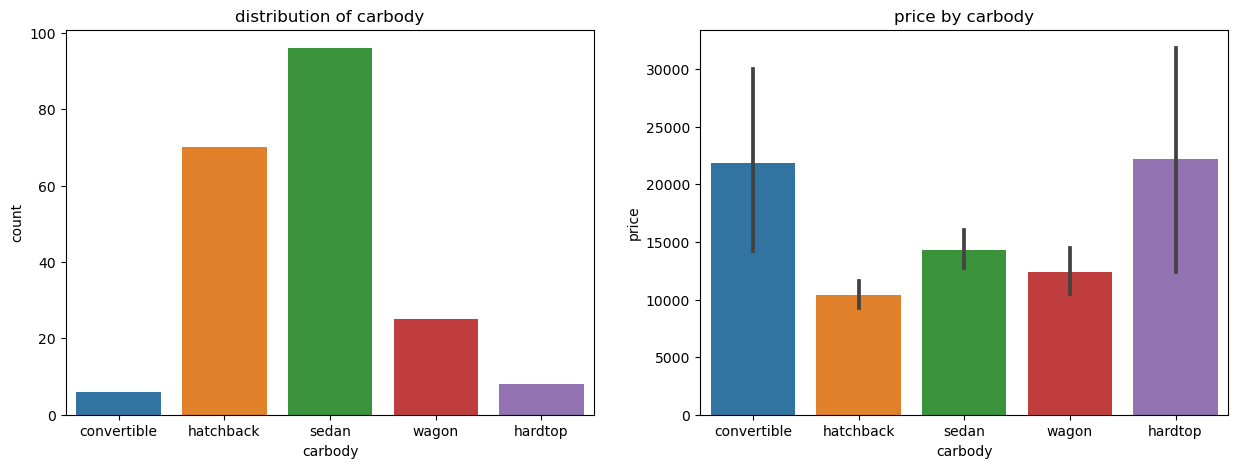

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df1, x=df1.carbody)
plt.title('distribution of carbody')
plt.subplot(1,2,2)
sns.barplot(data=df1,x=df1.carbody, y=df1.price)
plt.title('price by carbody')
plt.show()

##### Conclusion:
* Sedan and hatchback are more in demand.<br>
* hardtop and convertible have the highest price

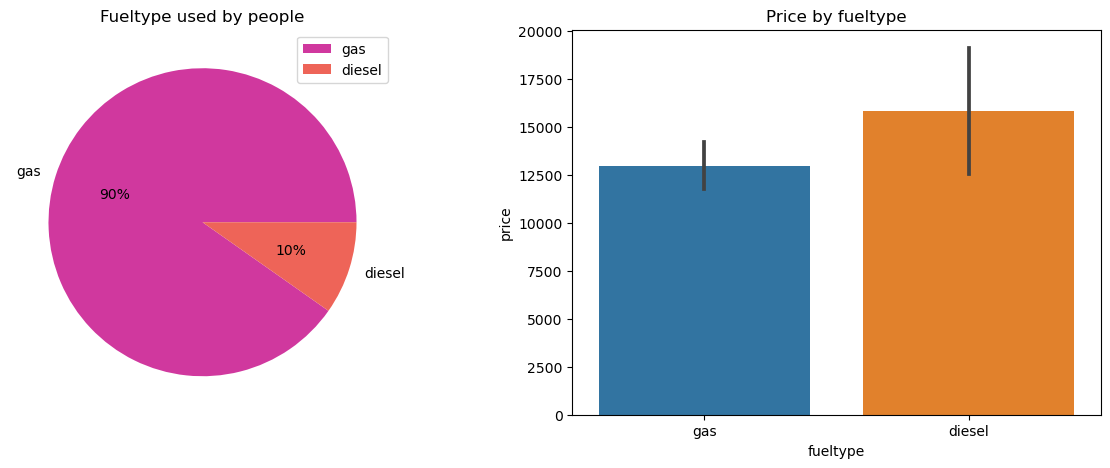

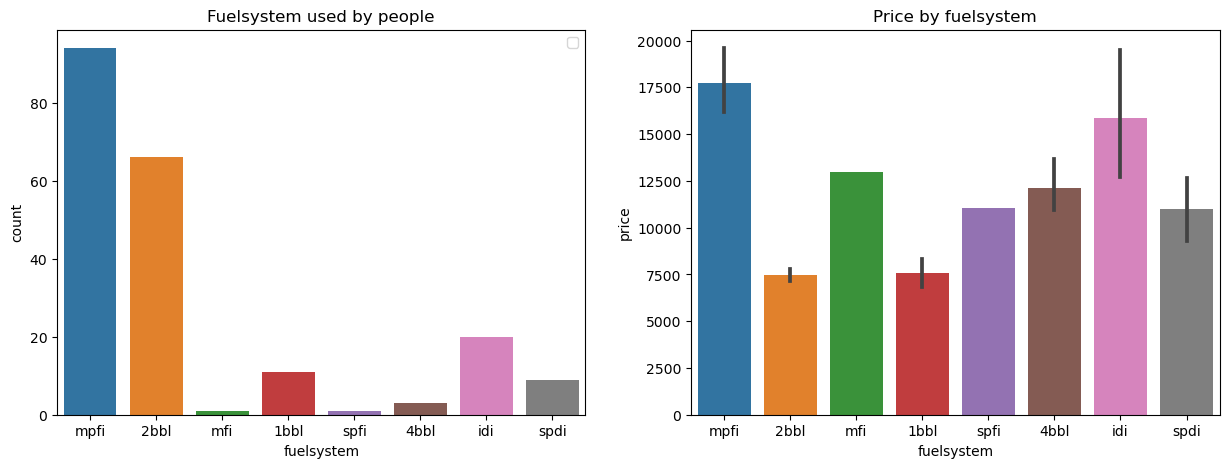

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(x=df1.fueltype.value_counts(),labels=['gas','diesel'],colors=['#d0389e', '#ee6458'],autopct='%.0f%%')
plt.title('Fueltype used by people')
plt.legend()

plt.subplot(1,2,2)
sns.barplot(data=df1,x=df1.fueltype, y=df1.price)
plt.title('Price by fueltype')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df1, x=df1.fuelsystem)
# plt./c(x=df1.fueltype.value_counts(),labels=['gas','diesel'],colors=['#d0389e', '#ee6458'],autopct='%.0f%%')
plt.title('Fuelsystem used by people')
plt.legend()

plt.subplot(1,2,2)
sns.barplot(data=df1,x=df1.fuelsystem, y=df1.price)
plt.title('Price by fuelsystem')
plt.show()

##### Conclusion
* Most of the people uses gas for vechile.
* Diesel is more expensive than gas.
* mpfi is most prefered fuelsystem in cars.

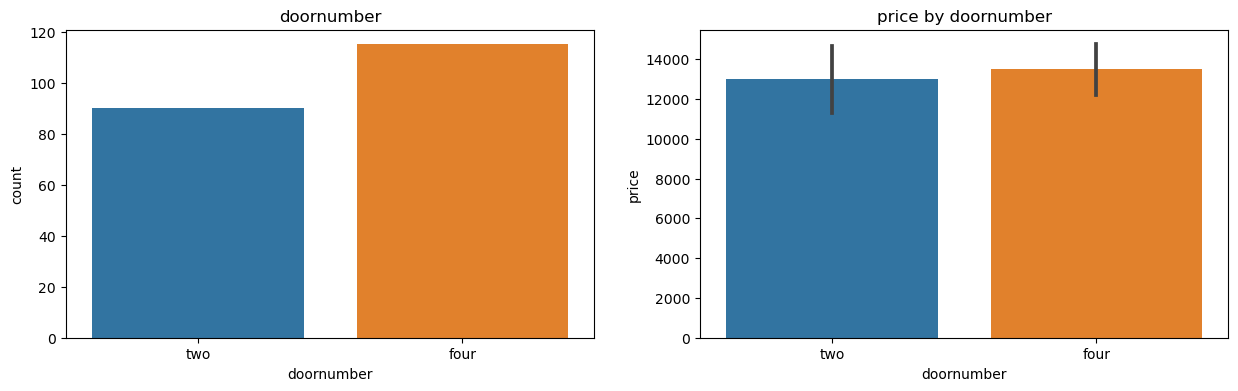

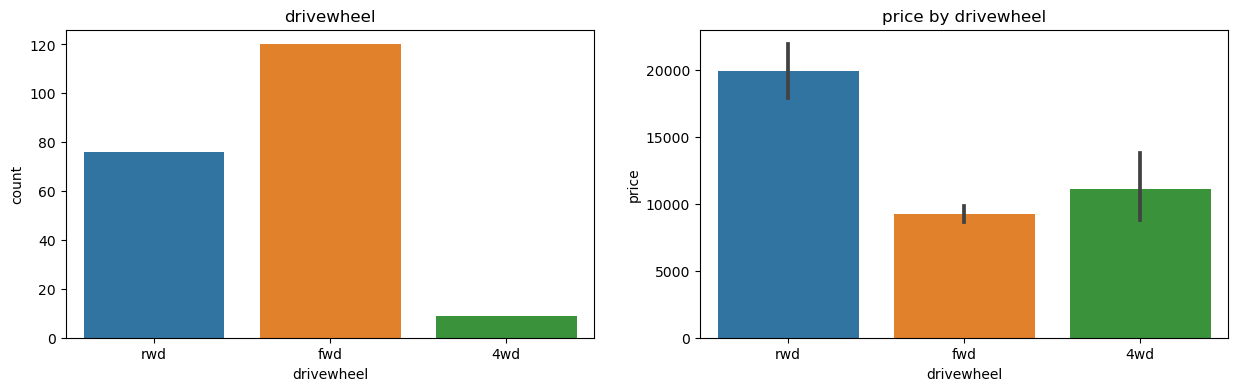

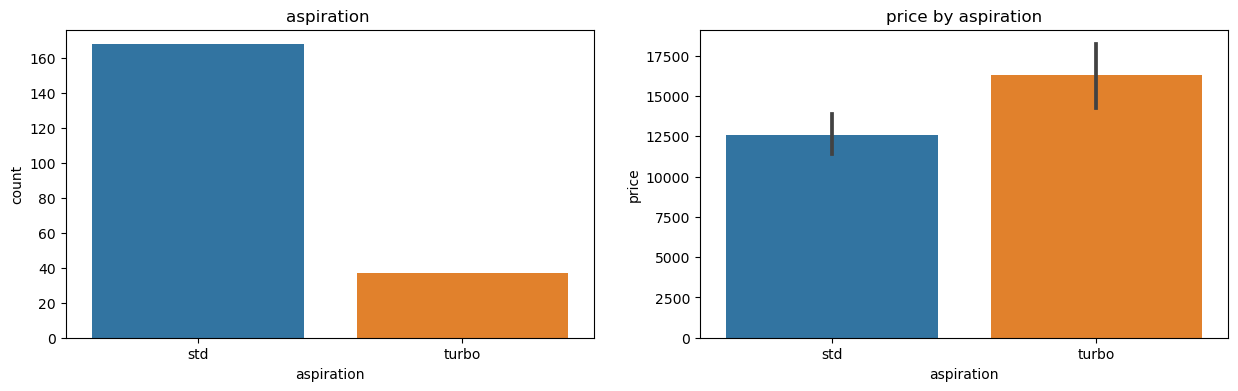

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=df1,x=df1.doornumber)
plt.title('doornumber')

plt.subplot(1,2,2)
sns.barplot(data=df1,x=df1.doornumber, y=df1.price)
plt.title('price by doornumber')
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=df1,x=df1.drivewheel)
plt.title('drivewheel')

plt.subplot(1,2,2)
sns.barplot(data=df1,x=df1.drivewheel, y=df1.price)
plt.title('price by drivewheel')
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=df1,x=df1.aspiration)
plt.title('aspiration ')

plt.subplot(1,2,2)
sns.barplot(data=df1,x=df1.aspiration, y=df1.price)
plt.title('price by aspiration')
plt.show()

##### Conclusion
* four doornumber is more in demand, Not much price difference in between 2 doornumber and 4 doornumber.
* Most of the drivewheels are front-wheel drive (FWD), which may be due to its lower cost compared to rear-wheel drive (RWD) and four-wheel drive (4WD).
* rwd is most expensive in comparison to both.
* Most of the people prefers standard (std) engine, as turbo is expensive.

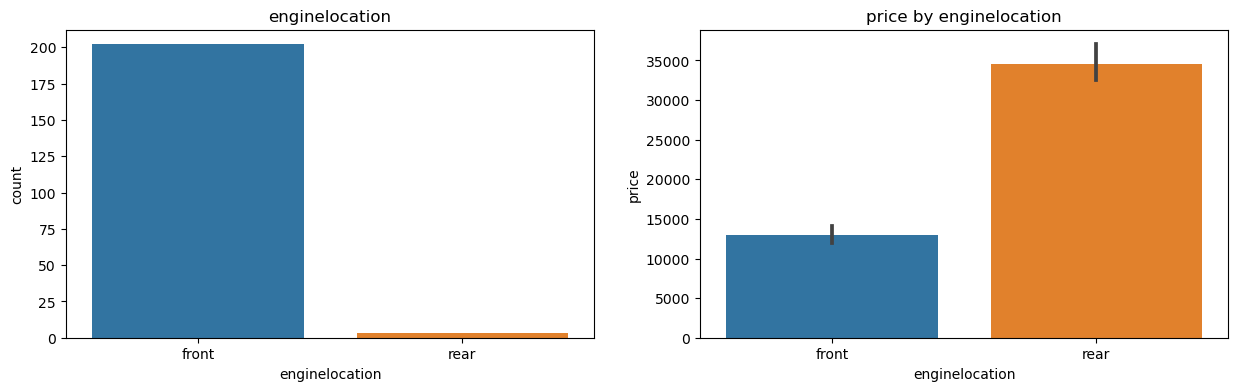

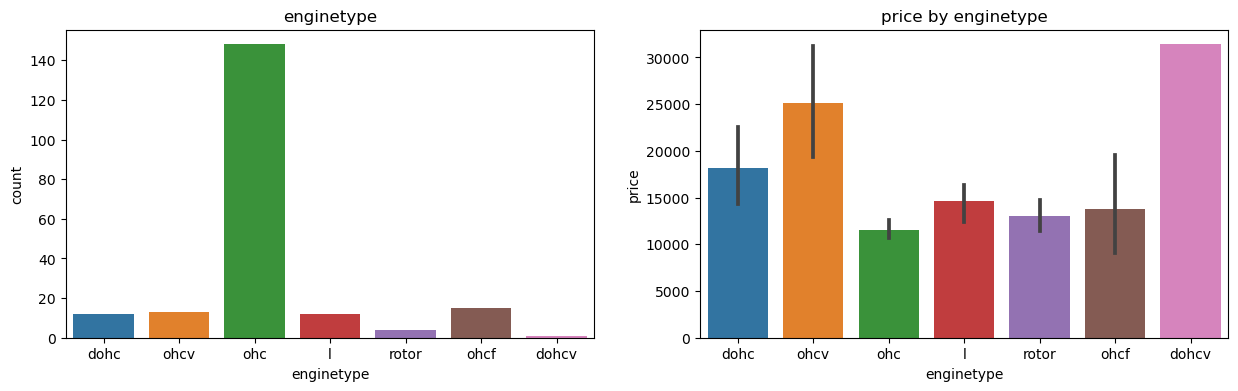

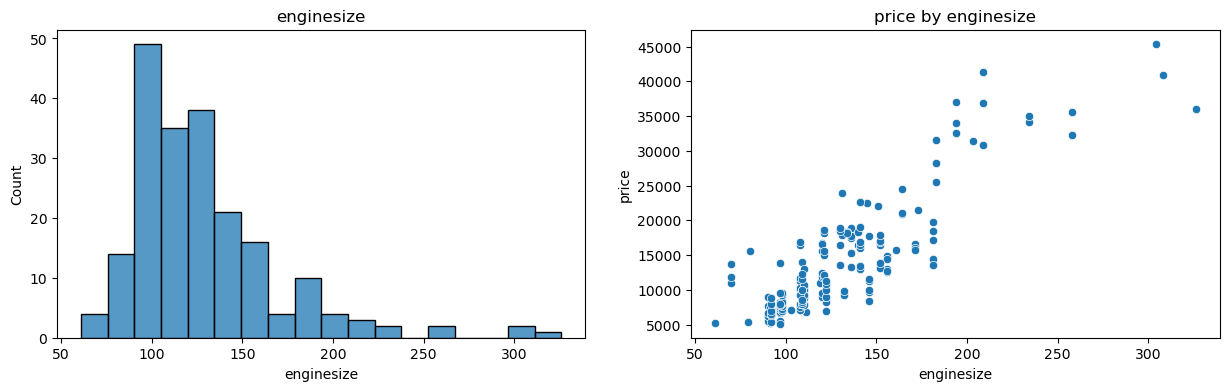

In [20]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=df1,x=df1.enginelocation)
plt.title('enginelocation')

plt.subplot(1,2,2)
sns.barplot(data=df1,x=df1.enginelocation, y=df1.price)
plt.title('price by enginelocation')
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=df1,x=df1.enginetype)
plt.title('enginetype')

plt.subplot(1,2,2)
sns.barplot(data=df1,x=df1.enginetype, y=df1.price)
plt.title('price by enginetype')
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(data=df1,x=df1.enginesize)
plt.title('enginesize')

plt.subplot(1,2,2)
sns.scatterplot(data=df1,x=df1.enginesize, y=df1.price)
plt.title('price by enginesize')
plt.show()

##### Conclusion
*  There is more preference for front enginelocation than rear enginelocation, perhaps because rear enginelocation is more expensive.
*  Most people prefer ohc enginetype, It may be because ohc engines are cheap, and DOHcv engines are least preferred because they are expensive.
* enginesize and price have significant positive linear correlation.

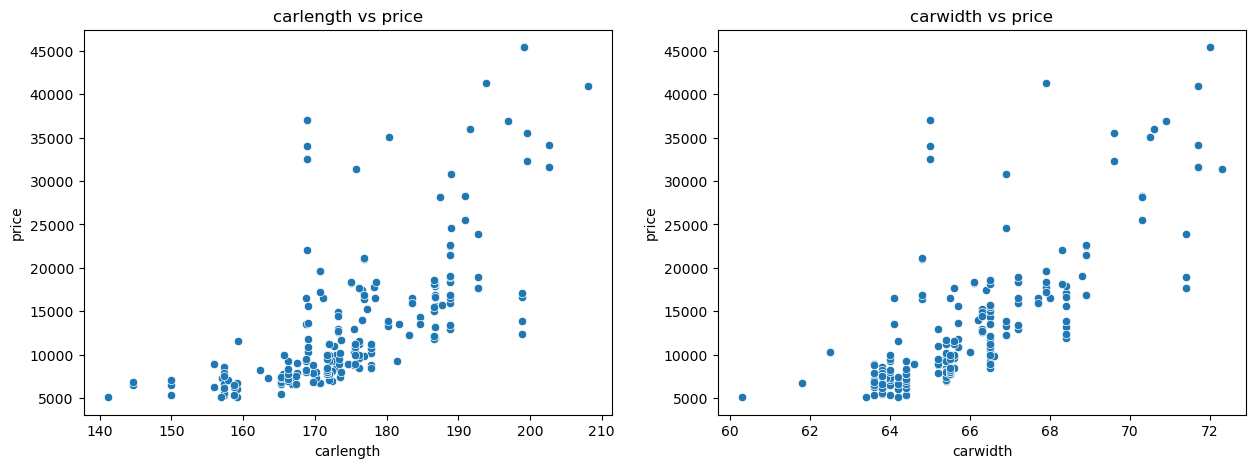

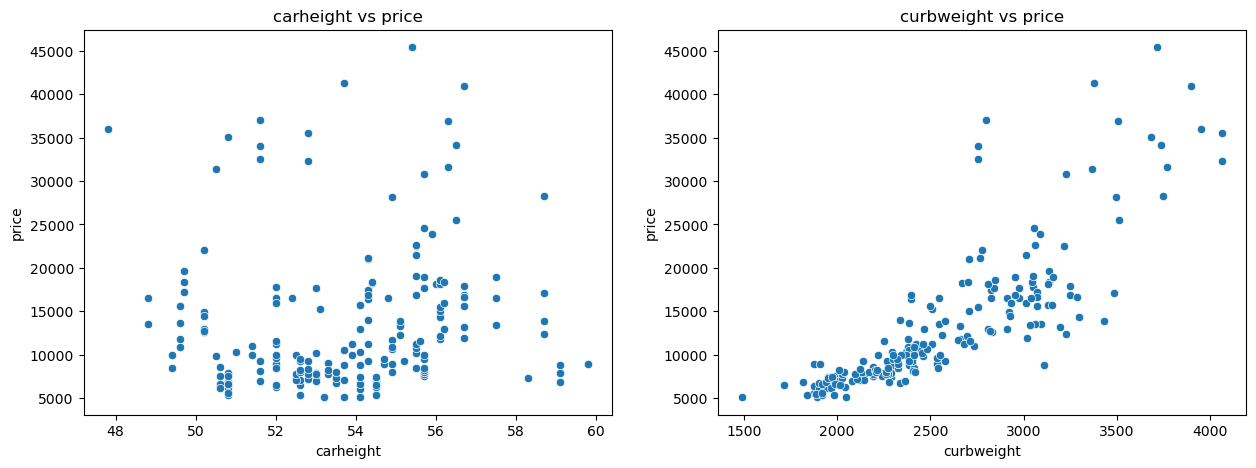

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df1,x=df1.carlength, y=df1.price)
plt.title('carlength vs price')

plt.subplot(1,2,2)
sns.scatterplot(data=df1,x=df1.carwidth, y=df1.price)
plt.title('carwidth vs price')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df1,x=df1.carheight, y=df1.price)
plt.title('carheight vs price')

plt.subplot(1,2,2)
sns.scatterplot(data=df1,x=df1.curbweight, y=df1.price)
plt.title('curbweight vs price')
plt.show()

##### Conclusion
* carwidth, carlength and curbweight seems to have a poitive correlation with price.
* carheight doesn't show any significant trend with price.

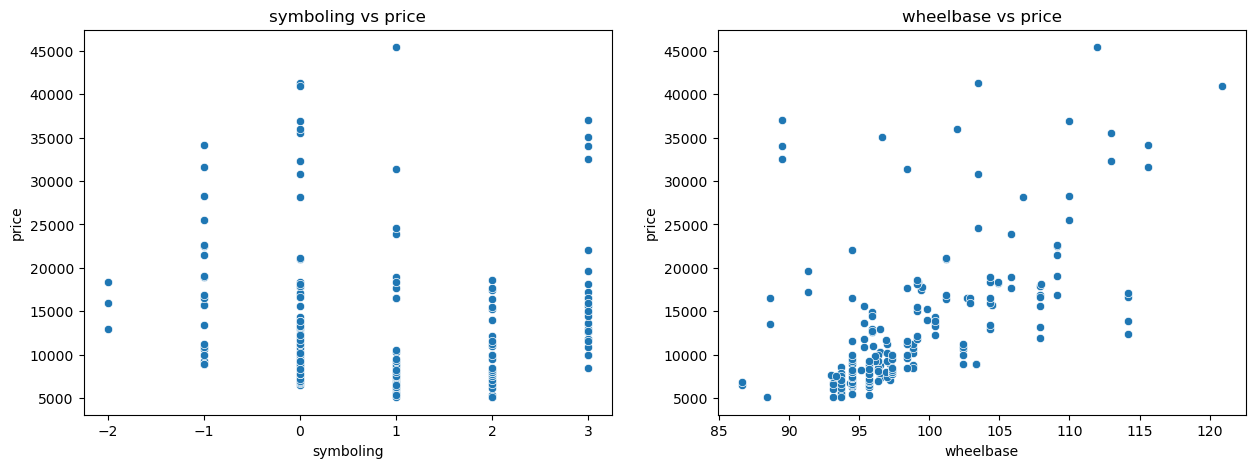

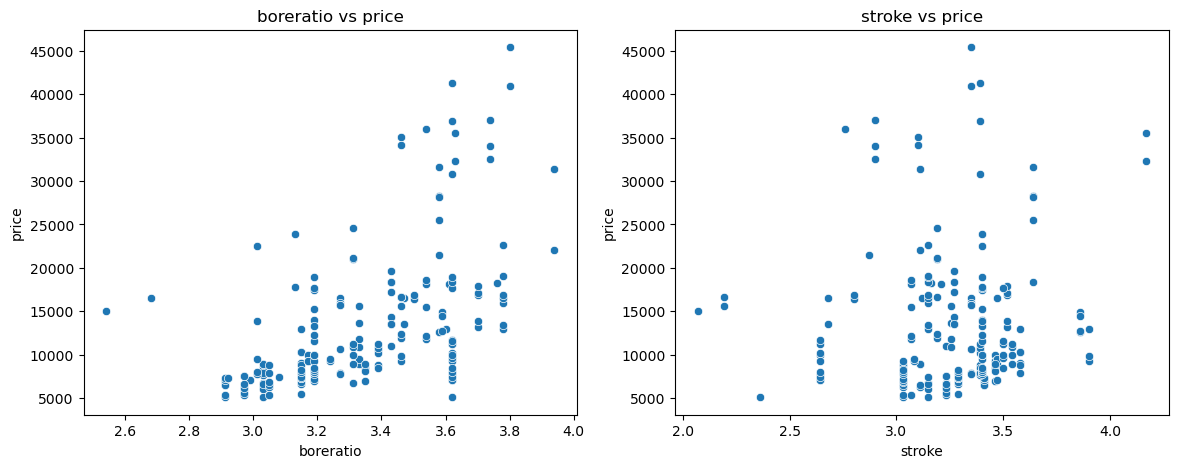

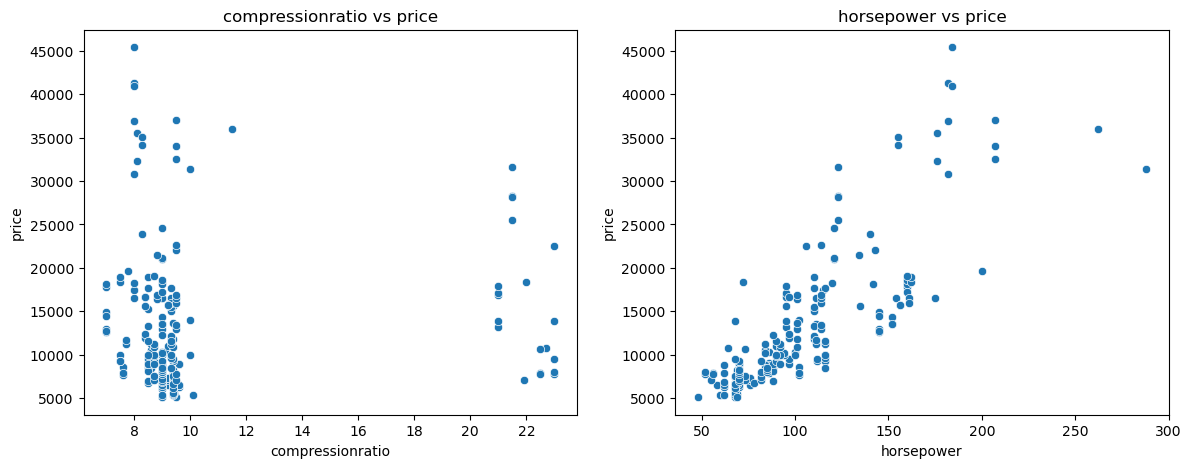

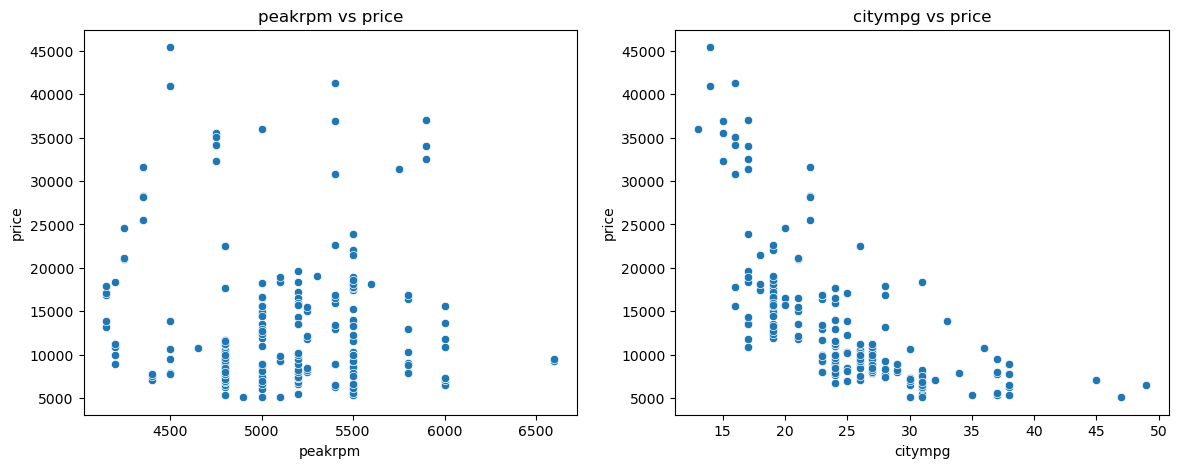

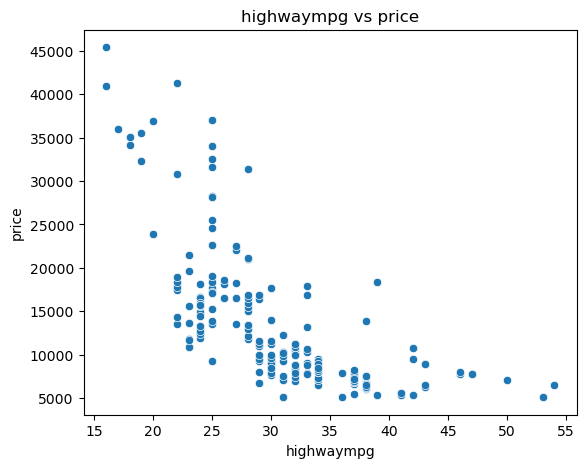

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df1,x=df1.symboling, y=df1.price)
plt.title('symboling vs price')

plt.subplot(1,2,2)
sns.scatterplot(data=df1,x=df1.wheelbase, y=df1.price)
plt.title('wheelbase vs price')
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df1,x=df1.boreratio, y=df1.price)
plt.title('boreratio vs price')

plt.subplot(1,2,2)
sns.scatterplot(data=df1,x=df1.stroke, y=df1.price)
plt.title('stroke vs price')
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df1,x=df1.compressionratio, y=df1.price)
plt.title('compressionratio vs price')

plt.subplot(1,2,2)
sns.scatterplot(data=df1,x=df1.horsepower, y=df1.price)
plt.title('horsepower vs price')
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df1,x=df1.peakrpm, y=df1.price)
plt.title('peakrpm vs price')

plt.subplot(1,2,2)
sns.scatterplot(data=df1,x=df1.citympg, y=df1.price)
plt.title('citympg vs price')
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df1,x=df1.highwaympg, y=df1.price)
plt.title('highwaympg vs price')
plt.show()

##### Conclusion
* enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
* citympg, highwaympg - seem to have a significant negative correlation with price.

## Feature Engineering

In [23]:
y=df1.price
X=df1.drop('price',axis=1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('tnf1',OrdinalEncoder(categories=[['two', 'four']]),['doornumber']),
                        ('tnf2',OrdinalEncoder(categories=[['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']]),['cylindernumber']),
                        ('tnf3',OneHotEncoder(sparse=False,drop='first'),['CompanyName','fueltype','aspiration','carbody','drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'])], 
                       remainder='passthrough')
df2=ct.fit_transform(X)

In [25]:
df2.shape

(205, 59)

## Model

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [28]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print("Mean squared error: ", mean_squared_error(y_pred,y_test))
print("MSE: ",mean_squared_error(y_pred,y_test))
print("Root mean square error: ", math.sqrt(mean_squared_error(y_pred,y_test)))
print("Mean absoulut error",mean_absolute_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))

Mean squared error:  8439979.848149873
MSE:  8439979.848149873
Root mean square error:  2905.164340988281
Mean absoulut error 1947.9143115430295
R2 score:  0.8781835095108135


In [29]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred2=regr.predict(X_test)

In [30]:
print("Mean squared error: ", mean_squared_error(y_pred2,y_test))
print("MSE: ",mean_squared_error(y_pred2,y_test))
print("Root mean square error: ", math.sqrt(mean_squared_error(y_pred2,y_test)))
print("Mean absoulut error",mean_absolute_error(y_test,y_pred2))
print("R2 score: ",r2_score(y_test,y_pred2))

Mean squared error:  6180329.026449176
MSE:  6180329.026449176
Root mean square error:  2486.0267549745267
Mean absoulut error 1900.0651781670795
R2 score:  0.9107976552532261


In [31]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred3=lasso.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+07, tolerance: 8.716e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [32]:
print("Mean squared error: ", mean_squared_error(y_pred3,y_test))
print("MSE: ",mean_squared_error(y_pred3,y_test))
print("Root mean square error: ", math.sqrt(mean_squared_error(y_pred3,y_test)))
print("Mean absoulut error",mean_absolute_error(y_test,y_pred3))
print("R2 score: ",r2_score(y_test,y_pred3))

Mean squared error:  8406812.50198218
MSE:  8406812.50198218
Root mean square error:  2899.450379292976
Mean absoulut error 1944.6237593785866
R2 score:  0.8786622227046458
